# Importing Libraries

In [2]:
#Importing the libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings('ignore')
#Download the following modules once
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\hruthik gowda
[nltk_data]     t\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hruthik gowda
[nltk_data]     t\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#Importing the training set
train_data = pd.read_excel("Data_Train.xlsx")

# EDA

In [5]:
#Printing the top 5 rows
train_data.head(5)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [6]:
train_data.SECTION.value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [7]:
#Printing the dataset info
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB
None


In [10]:
#Printing the shape of the dataset
print(train_data.shape)

(7628, 2)


In [11]:
#Printing the group by description of each category
train_data.groupby("SECTION").describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1686   1673  This story has been published from a wire agen...    4
1        2772   2731  This story has been published from a wire agen...   13
2        1924   1914  The consensus reads, “Exciting, entertaining, ...    3
3        1246   1233  This story has been published from a wire agen...   11

# Data Preprocessing

In [13]:
#Removing duplicates to avoid overfitting
train_data.drop_duplicates(inplace = True)

In [14]:
#A punctuations string for reference (added other valid characters from the dataset)
all_punctuations = string.punctuation + '‘’,:”][],' 

In [15]:
#Method to remove punctuation marks from the data
def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [16]:
#Method to remove stopwords from the data
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [17]:
#Method to lemmatize the words in the data
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [18]:
#Method to perform a complete cleaning
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [19]:
#Testing the cleaner method
text_cleaner("Hi!, this is a sample text to test the text cleaner method. Removes *@!#special characters%$^* and stopwords. And lemmatizes, go, going - run, ran, running")

'Hi sample text test text cleaner method Removes special character stopwords And lemmatizes go go run run run'

In [20]:
# %%time
# #Applying the cleaner method to the entire data
# train_data['CLEAN_STORY'] = train_data['STORY'].apply(text_cleaner)

Wall time: 9min 15s


In [23]:
#saving clean data
#train_data.to_csv("Clean.csv",index=False)
#loading clean data
train_data = pd.read_csv("Clean.csv")
train_data

,STORY,SECTION,CLEAN_STORY
0,But the most painful was the huge reversal in ...,3,But painful huge reversal fee income unheard a...
1,How formidable is the opposition alliance amon...,0,How formidable opposition alliance among Congr...
2,Most Asian currencies were trading lower today...,3,Most Asian currencies trade lower today South ...
3,"If you want to answer any question, click on ‘...",1,If want answer question click Answer After cli...
4,"In global markets, gold prices edged up today ...",3,In global market gold price edge today disappo...
...,...,...,...
7546,"Karnataka has been a Congress bastion, but it ...",0,Karnataka Congress bastion also give BJP first...
7547,"The film, which also features Janhvi Kapoor, w...",2,The film also feature Janhvi Kapoor revolve ar...
7548,The database has been created after bringing t...,1,The database create bring together criminal re...
7549,"The state, which has had an uneasy relationshi...",0,The state uneasy relationship mainland since d...


# Splitting data into train and test

In [24]:
X = train_data.CLEAN_STORY
Y = train_data.SECTION
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y, test_size = 0.25)

In [25]:
print(X_train.shape,y_train.shape)

(5663,) (5663,)


In [26]:
print(X_test.shape,y_test.shape)

(1888,) (1888,)


In [27]:
y_train.value_counts()

1    2048
2    1435
0    1255
3     925
Name: SECTION, dtype: int64

In [28]:
y_test.value_counts()

1    683
2    479
0    418
3    308
Name: SECTION, dtype: int64

# Feature Transformation

In [32]:
#Importing sklearn’s Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Creating a bag-of-words dictionary of words from the data
count_vect = CountVectorizer()

count_vect.fit(X_train)

X_train_vect = count_vect.transform(X_train)
X_test_vect = count_vect.transform(X_test)

In [33]:
print(X_train_vect.shape,X_test_vect.shape)

(5663, 30763) (1888, 30763)


# Modeling

In [40]:
#Creating a Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

#Fitting the training data to the classifier
classifier = MultinomialNB()

classifier.fit(X_train_vect,y_train)

MultinomialNB()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test, classifier.predict(X_test_vect)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       418
           1       0.97      0.98      0.97       683
           2       1.00      0.95      0.97       479
           3       0.97      0.98      0.97       308

    accuracy                           0.97      1888
   macro avg       0.97      0.97      0.97      1888
weighted avg       0.97      0.97      0.97      1888



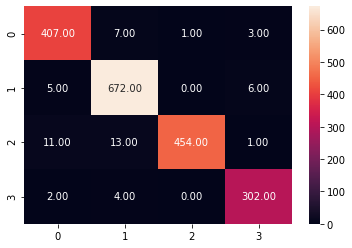

In [49]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test_vect)), annot=True, fmt = '.2f')